# Performance in the choice of pivot

In this notebook, we are going to discuss the performance of the two different
strategies to choose a good pivot in the context of the **selection algorithm**.

## What's a good pivot?

Given an input list **L**, a good pivot is an element of the list that splits the list in relatively equal sized sub lists **L_left** and **L_right**, when partitioning the elements of **L** around this element.

***Example:***
For L = [3, 1, 2, 5, 4], we can consider that <br>
* 3 is the **best pivot** because L_left = [1, 2] and L_right = [5, 4]
* 2 is a **correct** pivot because L_left = [1] and L_right = [3, 5, 4]
* 4 is a **correct** pivot because L_left = [3, 1, 2] and L_right = [5]
* 1 is a **bad** pivot because L_left = [] and L_right = [3, 2, 5, 4]
* 5 is a **bad** pivot because L_left = [3, 1, 2, 4] and L_right = []

You can easily deduce that the best pivot is actually the median of the list. Yet, finding the median is a sub-problem of the **selection algorithm**. Thus finding the best pivot for to solve the **selection problem**  (i.e. the median of the unsorted list) would require to run the **selection problem**. It's a sort of vicious circle...!

## Solutions

We are going to introduce two solutions for choosing the pivot

### 1. random pivot

This approach is really simple. I consists of taking any random number of a list and set it to be the pivot.

It is proven to have:
* an expected split of 50-50% in average
* a probability of 25-75% split or better* of 50%

Let's illustrate this result

In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np

from utils.inputs import InputList
from lib.plot_pivot_choice import plot_hist

plt.rcParams.update({'font.size': 18})

For the sake of simplification. Let's choose an input list": **[1..n]** with **n=100**, so that the value of the pivot will give the percentage of the split.

In [4]:
test_list = InputList(l_length=100, distinct_elements=True, min_value=1, max_value=100)
print(f'The chosen list is:\n {test_list}')
print(f'A random split would be:\n{random.choice(test_list)}')


The chosen list is:
 [13, 58, 7, 15, 8, 69, 61, 95, 17, 31, 39, 25, 28, 36, 63, 16, 30, 5, 85, 82, 76, 41, 48, 4, 93, 24, 47, 57, 45, 59, 6, 3, 65, 19, 79, 73, 94, 67, 40, 50, 91, 74, 92, 71, 88, 14, 83, 46, 2, 66, 18, 49, 77, 89, 43, 81, 52, 51, 60, 96, 75, 26, 35, 55, 90, 80, 9, 38, 99, 87, 53, 100, 34, 27, 78, 97, 70, 72, 22, 84, 37, 56, 86, 1, 62, 29, 11, 98, 44, 32, 54, 33, 64, 12, 42, 20, 21, 10, 68, 23]
A randomsplit would be:
39


Let's iterate over this process a great number of times and store the results

In [5]:
test_list = InputList(l_length=100, distinct_elements=True, min_value=1, max_value=100)
results_pivots = [random.choice(test_list) for i in range(10000)]
average_percentage = round(np.average(results_pivots), 2)
percent_25_75 = len([x for x in results_pivots if 25<=x<=75])/len(test_list)
print(f'average_percentage: {average_percentage}\npercent_25_75: {percent_25_75}')

average_percentage: 50.32
percent_25_75: 50.94


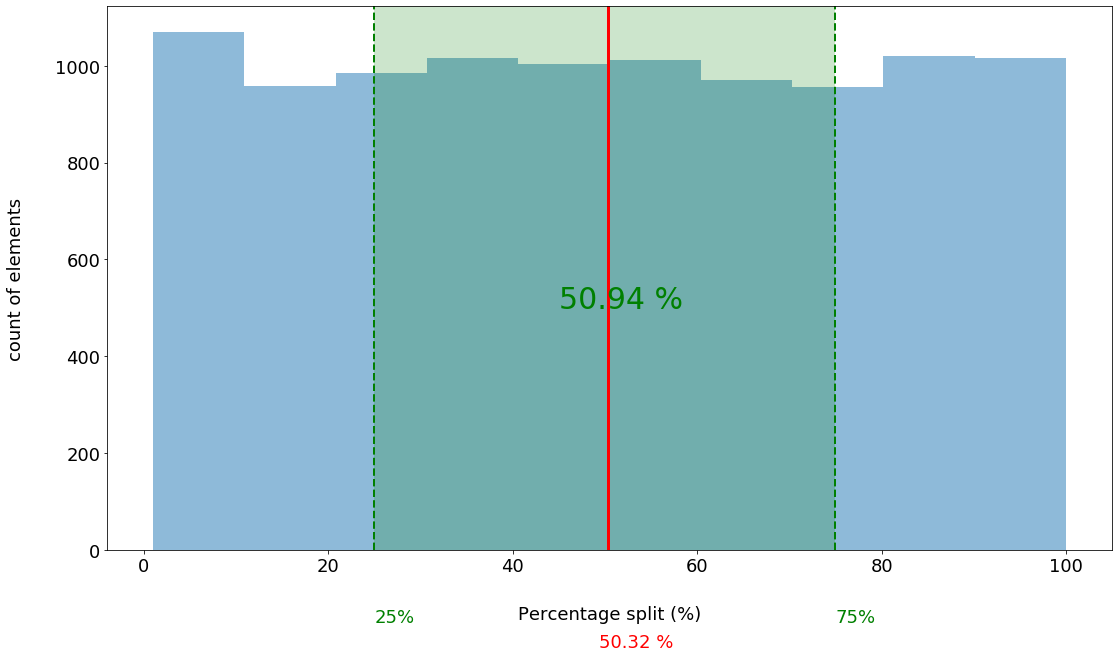

In [6]:
plot_hist(results_pivots=results_pivots, 
          percent_25_75=percent_25_75, 
          average_percentage=average_percentage)

### 2. Median of medians

This approach is strictly different. <br>
It is a bit moe tedious, but it is worth it, we:
1. chunk the list in sub-lists of five
2. compute the median of each list
3. store each median in a list of medians
4. recursively reiterate the process until the final list is of length <=5, so that we can extract the median easily

Let's see how performant such a method to choose the pivot is.

In [7]:
def find_median_small_list(L: list) -> int:
    """
    Computes the median for a small list (length <= 5)
    Args:
        L: Sorted list of length <=5

    Returns:
        The median
    """
    assert len(L) <= 5, "You are trying to cheat, this function is used only for " \
                        "small lists (len<=5)"
    return sorted(L)[int(len(L) / 2)]


def find_median_of_medians(L: list):
    """
    Choose a pivot in a list using the method of median of medians
    Args:
        LInput list

    Returns:
        Pivot from the list found by median of medians
    """
    n = len(L)
    if n <= 5:
        return find_median_small_list(L)
    else:
        C = [find_median_small_list(L[i:i + 5]) for i in range(0, n, 5)]
        return find_median_of_medians([find_median_small_list(L[i:i + 5]) 
                             for i in range(0, n, 5)])

**Note**: <br> Contrary to the **random pivot** approach, for this method, keeping the same list for each test will give the same result. We then need to generate different input lists [1..n] with **n=100** at each test, which will at the end of the day simply be a shuffle of the same list*

In [8]:
results_pivots = []
for i in range(10000):
    test_list = InputList(l_length=100, distinct_elements=True, min_value=1, max_value=100)
    results_pivots.append(find_median_of_medians(test_list))
average_percentage = round(np.average(results_pivots), 2)
percent_25_75 = len([x for x in results_pivots if 25<=x<=75])/len(test_list)
print(f'average_percentage: {average_percentage}\npercent_25_75: {percent_25_75}')

average_percentage: 53.79
percent_25_75: 100.0


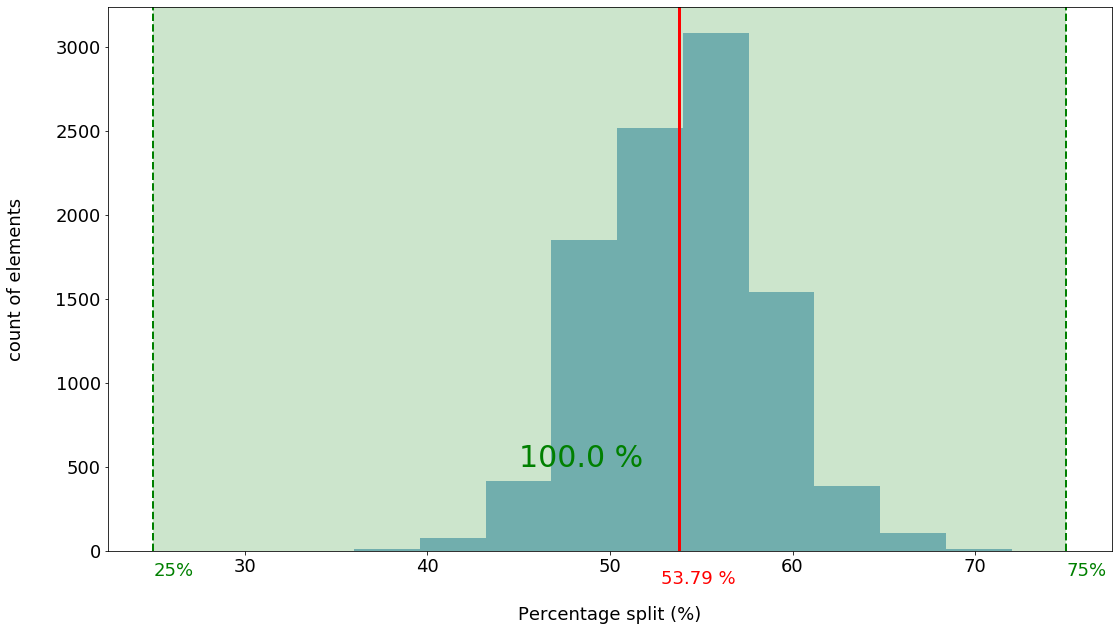

In [9]:
plot_hist(results_pivots=results_pivots, 
          percent_25_75=percent_25_75, 
          average_percentage=average_percentage)

😲 The result is really different from that of a standard random choice of the pivot. <br>
We can notice that: <br>

- 👎 The split seems to be a bit of: not 50-50 but more **54-46**
- 👍👍 The **25-75%** or better select is obtained in 100% of the case.

Let's try to figure out which range of percentage would ensure a probability of 50%

In [11]:
x= np.arange(1, 55, 1)
prob_range = [len([x for x in results_pivots
                if low<=x<=100-low])/len(test_list)
              for low in x]
h_50 = np.full(fill_value=50, shape=len(x))
low_bound_50 = np.argwhere(np.diff(np.sign(prob_range - h_50))).flatten()[0]

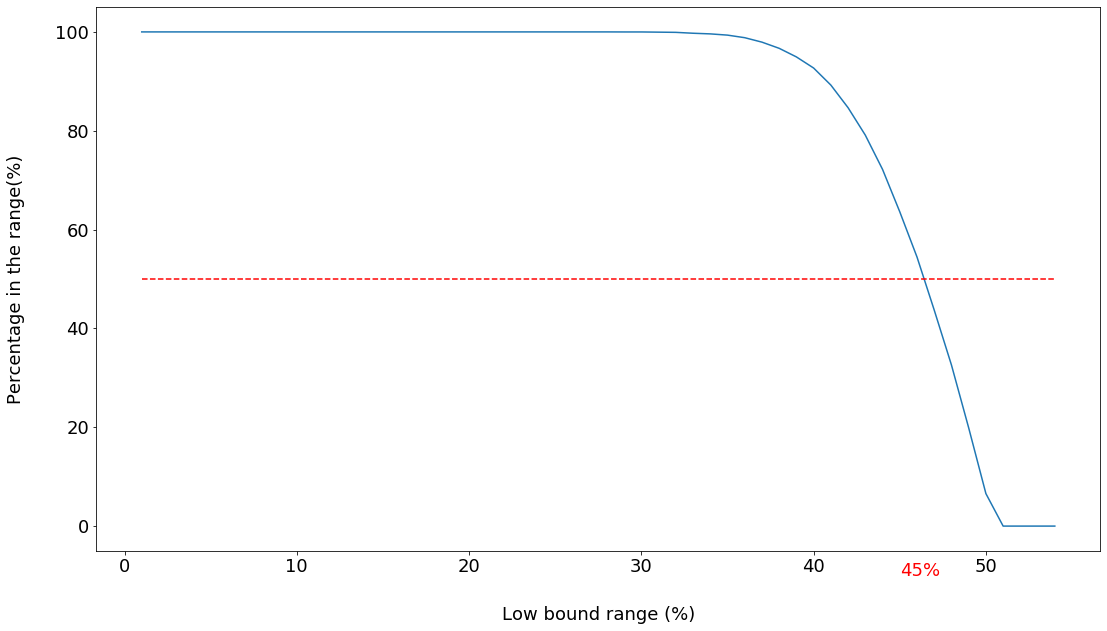

The right range of split that we can ensure at 50% is 45-55


In [12]:
plt.figure(figsize=(18, 10))
plt.plot(x, prob_range)
plt.plot(x, h_50, linestyle='--', c='red')
plt.xlabel('Low bound range (%)', labelpad=30)
plt.ylabel('Percentage in the range(%)', labelpad=30)
plt.text(x=low_bound_50, y=-10, s=f'{low_bound_50}%', c='red')
plt.show()
print(f"The right range of split that we can ensure at 50% is {low_bound_50}-{100-low_bound_50}")

## Simple check

Just to be sure, let's check out whether the choice of a different list at each iteration impacts the result for the **random pivot** approach or not.

In [14]:
results_pivots = []
for i in range(10000):
    test_list = InputList(l_length=100, distinct_elements=True, min_value=1, max_value=100)
    results_pivots.append(random.choice(test_list))
average_percentage = round(np.average(results_pivots), 2)
percent_25_75 = len([x for x in results_pivots if 25<=x<=75])/len(test_list)
print(f'average_percentage: {average_percentage}\npercent_25_75: {percent_25_75}')

average_percentage: 50.44
percent_25_75: 50.37


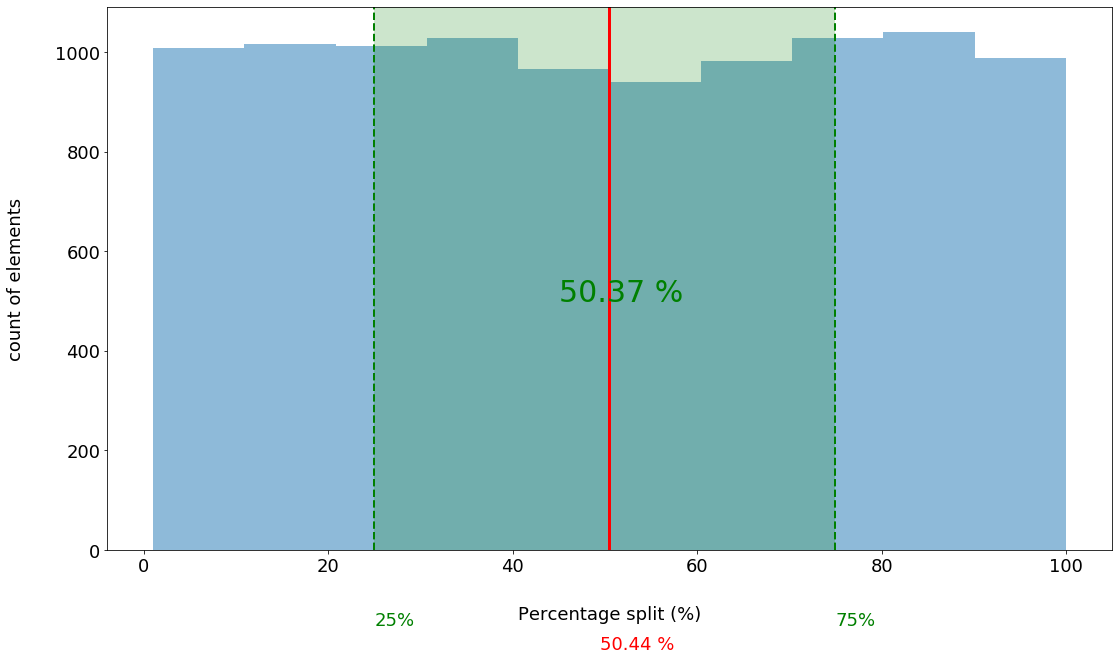

In [15]:
plot_hist(results_pivots=results_pivots, 
          percent_25_75=percent_25_75, 
          average_percentage=average_percentage)

## Time complexity comparison

It seems that the **median of medians** approach gives a better pivot in general.<br>
However, isn't it too time consuming compared to a built-in algorithm running in constant time... <br>
Let's check that out..

In [26]:
from compare_algos.collection_algos import CollectionAlgosList

In [27]:
compare_pivot_selector = CollectionAlgosList(random.choice, find_median_of_medians)

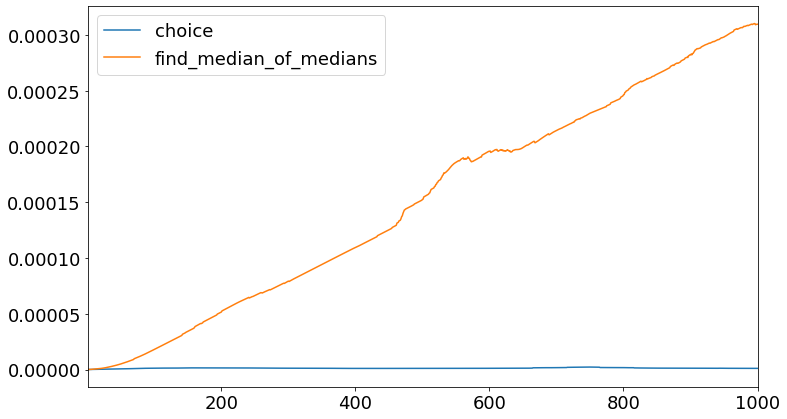

In [28]:
compare_pivot_selector.calculate_time_multiple_lists(range_length=1000, 
                                                     harmonization=True, 
                                                     f_harmonization=100).plot(figsize=(12, 7))

Indeed, the find_median_of_medians seems has an increasing time complexity. If its use inside another algorithm of selection: **deterministic_selection** to find the i-th order statistics in a list allows to reduce the number of steps of the process by choosing a better pivot at each iteration, we could consider that the time cost is worth it.

Check out the other notebook to see the result 😊